### Part 1

In [43]:
import numpy as np
import matplotlib.pyplot as plt

def getPositionEncoding(seq_len, d, n=10000):
    P = np.zeros((seq_len, d))
    for k in range(seq_len):
        for i in np.arange(int(d/2)):
            denominator = np.power(n, 2*i/d)
            P[k, 2*i] = np.sin(k/denominator)
            P[k, 2*i+1] = np.cos(k/denominator)
            print(n,i,d,denominator)
    return P

P = getPositionEncoding(seq_len=4, d=4, n=100)
print(P)

10000 0 4 1.0
10000 1 4 100.0
10000 0 4 1.0
10000 1 4 100.0
10000 0 4 1.0
10000 1 4 100.0
10000 0 4 1.0
10000 1 4 100.0
[[ 0.          1.          0.          1.        ]
 [ 0.84147098  0.54030231  0.00999983  0.99995   ]
 [ 0.90929743 -0.41614684  0.01999867  0.99980001]
 [ 0.14112001 -0.9899925   0.0299955   0.99955003]]


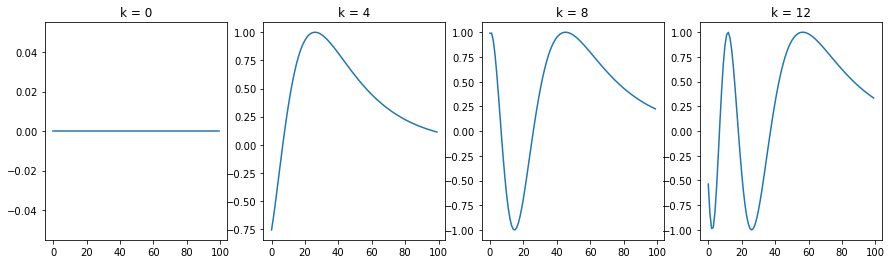

In [2]:
def plotSinusoid(k, d=512, n=10000):
    x = np.arange(0, 100, 1)
    denominator = np.power(n, 2*x/d)
    y = np.sin(k/denominator)
    plt.plot(x, y)
    plt.title('k = ' + str(k))

fig = plt.figure(figsize=(15, 4))    
for i in range(4):
    plt.subplot(141 + i)
    plotSinusoid(i*4)

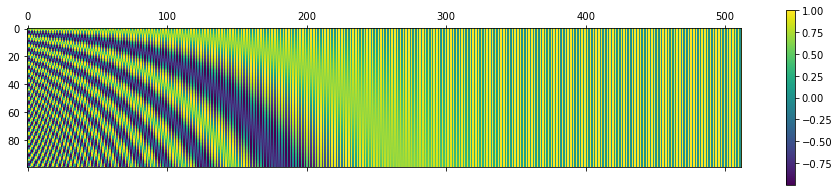

In [4]:
P = getPositionEncoding(seq_len=100, d=512, n=10000)
cax = plt.matshow(P)
plt.gcf().colorbar(cax);

### Part 2

In [44]:
import tensorflow as tf
from tensorflow import convert_to_tensor, string
from tensorflow.keras.layers import TextVectorization, Embedding, Layer
from tensorflow.data import Dataset
import numpy as np
import matplotlib.pyplot as plt

In [45]:
output_sequence_length = 5
vocab_size = 10
sentences = [["I am a robot"], ["you too robot"]]
sentence_data = Dataset.from_tensor_slices(sentences)
# Create the TextVectorization layer
vectorize_layer = TextVectorization(
                  output_sequence_length=output_sequence_length,
                  max_tokens=vocab_size)
# Train the layer to create a dictionary
vectorize_layer.adapt(sentence_data)
# Convert all sentences to tensors
word_tensors = convert_to_tensor(sentences, dtype=tf.string)
# Use the word tensors to get vectorized phrases
vectorized_words = vectorize_layer(word_tensors)
print("Vocabulary: ", vectorize_layer.get_vocabulary())
print("Vectorized words: ", vectorized_words)

Vocabulary:  ['', '[UNK]', 'robot', 'you', 'too', 'i', 'am', 'a']
Vectorized words:  tf.Tensor(
[[5 6 7 2 0]
 [3 4 2 0 0]], shape=(2, 5), dtype=int64)


In [46]:
output_length = 6
word_embedding_layer = Embedding(vocab_size, output_length)
embedded_words = word_embedding_layer(vectorized_words)
print(embedded_words)

tf.Tensor(
[[[-0.00190278  0.0453083  -0.02093213  0.02379377 -0.01791368
   -0.02237074]
  [ 0.00256069  0.03682962 -0.01296359 -0.04335038  0.00803208
    0.03951924]
  [-0.04606198  0.02780339  0.04749812  0.00017159  0.04345317
   -0.00071076]
  [-0.03474332  0.03318257 -0.02700554  0.03420241 -0.00761778
   -0.03505858]
  [-0.01649938 -0.00078342  0.03103368 -0.00276069 -0.00378181
    0.01551547]]

 [[-0.04501817  0.03957346 -0.02396482  0.03338944 -0.01583822
   -0.03357261]
  [-0.03220431 -0.01307976 -0.04971603  0.03650052  0.04206112
   -0.03044769]
  [-0.03474332  0.03318257 -0.02700554  0.03420241 -0.00761778
   -0.03505858]
  [-0.01649938 -0.00078342  0.03103368 -0.00276069 -0.00378181
    0.01551547]
  [-0.01649938 -0.00078342  0.03103368 -0.00276069 -0.00378181
    0.01551547]]], shape=(2, 5, 6), dtype=float32)


In [49]:
position_embedding_layer = Embedding(output_sequence_length, output_length)
position_indices = tf.range(output_sequence_length)
embedded_indices = position_embedding_layer(position_indices)
print(embedded_indices)

tf.Tensor(
[[-0.04175308  0.01570207 -0.00629871  0.03196123  0.02362898  0.01209252]
 [-0.00492781 -0.04367312 -0.03576629 -0.04562289 -0.01923862 -0.01052457]
 [ 0.03971669  0.01938901  0.01863663  0.03855943  0.01497997  0.04716581]
 [-0.02836706  0.04189089  0.0337973  -0.0364593  -0.02970083 -0.01377656]
 [ 0.04081741 -0.02659359  0.01997085 -0.02929622 -0.01862137 -0.02234323]], shape=(5, 6), dtype=float32)


In [51]:
final_output_embedding = embedded_words + embedded_indices
print("Final output: ", final_output_embedding)

Final output:  tf.Tensor(
[[[-0.04365586  0.06101037 -0.02723084  0.055755    0.00571531
   -0.01027822]
  [-0.00236713 -0.0068435  -0.04872989 -0.08897326 -0.01120653
    0.02899467]
  [-0.00634529  0.0471924   0.06613475  0.03873102  0.05843314
    0.04645505]
  [-0.06311037  0.07507347  0.00679176 -0.0022569  -0.03731861
   -0.04883514]
  [ 0.02431803 -0.02737701  0.05100453 -0.03205691 -0.02240318
   -0.00682776]]

 [[-0.08677125  0.05527554 -0.03026353  0.06535067  0.00779077
   -0.02148009]
  [-0.03713212 -0.05675289 -0.08548233 -0.00912237  0.02282251
   -0.04097226]
  [ 0.00497337  0.05257158 -0.00836891  0.07276183  0.00736219
    0.01210723]
  [-0.04486644  0.04110747  0.06483098 -0.03921999 -0.03348263
    0.00173891]
  [ 0.02431803 -0.02737701  0.05100453 -0.03205691 -0.02240318
   -0.00682776]]], shape=(2, 5, 6), dtype=float32)


In [63]:
x=np.array([[0, 1, 2, 3, 4],
[5, 1, 2, 3, 6]])
vocab_size = 7
output_length = 2
input_length = 5
word_embedding_layer = Embedding(vocab_size, output_length)
embedded_words = word_embedding_layer(x)
embedded_words

<tf.Tensor: shape=(2, 5, 2), dtype=float32, numpy=
array([[[ 0.00702748,  0.01953189],
        [-0.0056653 ,  0.03005012],
        [ 0.03898323, -0.02169312],
        [ 0.00704272, -0.02516173],
        [ 0.01886017, -0.00670771]],

       [[-0.00257143,  0.01137197],
        [-0.0056653 ,  0.03005012],
        [ 0.03898323, -0.02169312],
        [ 0.00704272, -0.02516173],
        [ 0.01008055,  0.03951179]]], dtype=float32)>